In [1]:
pip install numpy pandas matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


Accuracy: 0.9824561403508771
Precision: 0.9726027397260274
Recall: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Confusion Matrix:


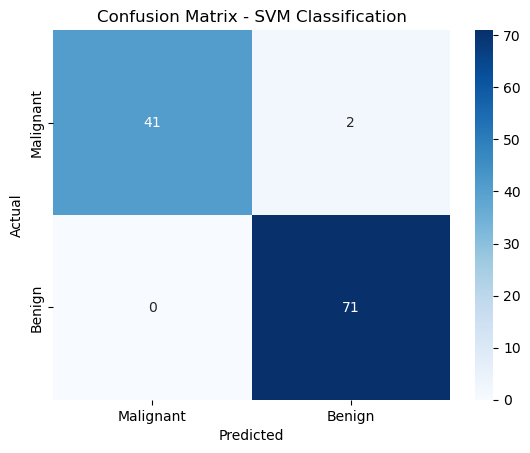

In [4]:
# 1. Medical Diagnosis Using SVM 
# • Scenario: A hospital wants to automate the diagnosis of skin cancer using image 
# data.  
# • Task: Train an SVM to classify skin lesions as benign or malignant using image 
# features.
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
df['target'] = cancer_data.target

# Split features and target
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM model with RBF kernel
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM Classification')
plt.show()


   Income  CreditScore  EmploymentYears  Defaulted
0   40000          600                1          1
1   80000          750                5          0
2   20000          580                0          1
3   50000          690                2          0
4  120000          800               10          0
5   30000          610                1          1
6   70000          720                4          0
7  100000          790                6          0
Accuracy: 1.0
[[1 0]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



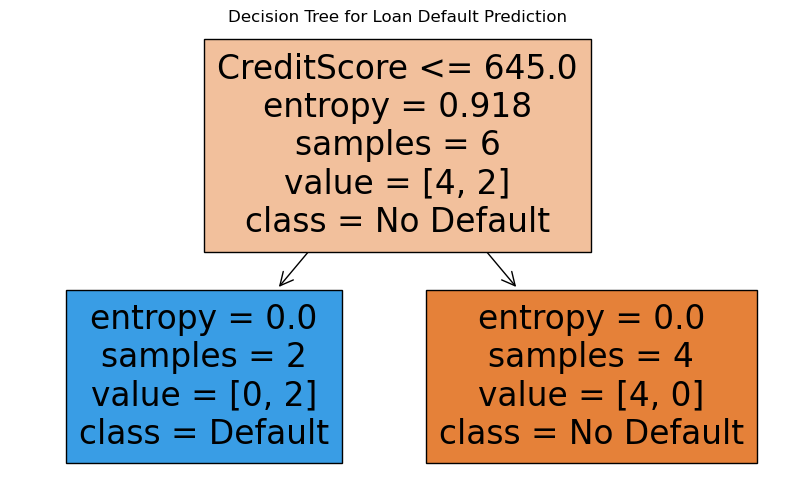

In [6]:
# 2. Loan Default Prediction with Decision Trees 
# • Scenario: A bank needs to assess loan applicants for risk of default.  
# • Task: Use decision trees to classify applicants based on income, credit score, 
# and employment history. 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Sample dataset
data = {
    'Income': [40000, 80000, 20000, 50000, 120000, 30000, 70000, 100000],
    'CreditScore': [600, 750, 580, 690, 800, 610, 720, 790],
    'EmploymentYears': [1, 5, 0, 2, 10, 1, 4, 6],
    'Defaulted': [1, 0, 1, 0, 0, 1, 0, 0]  # 1 = Defaulted, 0 = No Default
}

df = pd.DataFrame(data)
print(df)

# Features and target
X = df[['Income', 'CreditScore', 'EmploymentYears']]
y = df['Defaulted']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train Decision Tree
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(10,6))
plot_tree(model, feature_names=X.columns, class_names=['No Default', 'Default'], filled=True)
plt.title("Decision Tree for Loan Default Prediction")
plt.show()


   Glucose   BMI  Age  Diabetes
0       85  22.1   25         0
1       89  24.3   28         0
2       90  26.5   32         0
3      120  28.0   35         1
4      130  30.2   40         1
5      150  31.4   45         1
6      155  32.8   48         1
7      160  34.5   50         1
8      170  35.0   52         1
9      180  36.5   55         1
Accuracy: 1.0
[[1 0]
 [0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



C:\Users\AKANKSHA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


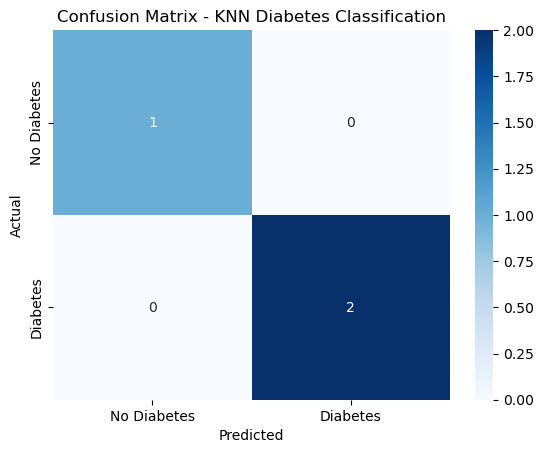

In [7]:
# 3. Disease Classification with KNN 
# • Scenario: A clinic wants to predict whether a patient has diabetes based on 
# health metrics.  
# • Task: Apply KNN to classify patients using features like glucose level, BMI, and 
# age. 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Create a small custom dataset
data = {
    'Glucose': [85, 89, 90, 120, 130, 150, 155, 160, 170, 180],
    'BMI': [22.1, 24.3, 26.5, 28.0, 30.2, 31.4, 32.8, 34.5, 35.0, 36.5],
    'Age': [25, 28, 32, 35, 40, 45, 48, 50, 52, 55],
    'Diabetes': [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]  # 1 = Diabetes, 0 = No Diabetes
}

df = pd.DataFrame(data)
print(df)

# Features and target
X = df[['Glucose', 'BMI', 'Age']]
y = df['Diabetes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)

# Predict
y_pred = knn_model.predict(X_test_scaled)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN Diabetes Classification')
plt.show()


                                  Email  Label
0                         Win money now      1
1   Lowest price for your car insurance      1
2        Meeting scheduled for tomorrow      0
3              Your invoice is attached      0
4                        Earn cash fast      1
5             Project deadline extended      0
6  Congratulations you have won lottery      1
7           Let's catch up this weekend      0
Accuracy: 0.0
[[0 1]
 [1 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



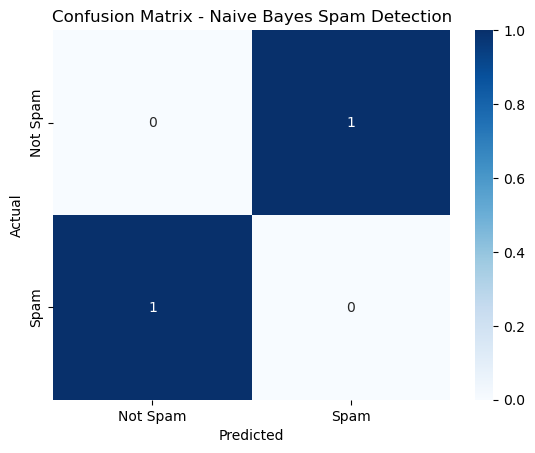

In [8]:
# 4. Email Spam Detection Using Naive Bayes 
# • Scenario: An email service provider wants to filter spam messages.  
# • Task: Use Naive Bayes to classify emails based on word frequency and 
# metadata.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Sample email dataset
data = {
    'Email': [
        "Win money now", 
        "Lowest price for your car insurance", 
        "Meeting scheduled for tomorrow", 
        "Your invoice is attached", 
        "Earn cash fast", 
        "Project deadline extended", 
        "Congratulations you have won lottery", 
        "Let's catch up this weekend"
    ],
    'Label': [1, 1, 0, 0, 1, 0, 1, 0]  # 1 = Spam, 0 = Not Spam
}

df = pd.DataFrame(data)
print(df)

# Split features and target
X = df['Email']
y = df['Label']

# Convert text to numerical features using Bag of Words
vectorizer = CountVectorizer()
X_features = vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.25, random_state=42)

# Train Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes Spam Detection')
plt.show()


                                      Review  Sentiment
0         I love this product, it’s amazing!          1
1     Very poor quality, not worth the money          0
2       Absolutely fantastic, will buy again          1
3  Terrible experience, totally disappointed          0
4        Excellent quality and fast delivery          1
5      Worst purchase ever, do not recommend          0
6       The product exceeded my expectations          1
7      Not satisfied, it broke after one day          0
Accuracy: 0.0
[[0 2]
 [0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



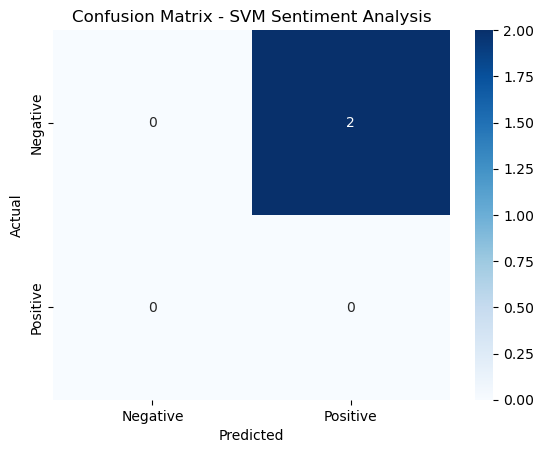

In [10]:
# 5. Customer Sentiment Analysis with SVM 
# • Scenario: An e-commerce company wants to analyze customer reviews.  
# • Task: Train an SVM to classify reviews as positive or negative using text data.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataset
data = {
    'Review': [
        "I love this product, it’s amazing!",
        "Very poor quality, not worth the money",
        "Absolutely fantastic, will buy again",
        "Terrible experience, totally disappointed",
        "Excellent quality and fast delivery",
        "Worst purchase ever, do not recommend",
        "The product exceeded my expectations",
        "Not satisfied, it broke after one day"
    ],
    'Sentiment': [1, 0, 1, 0, 1, 0, 1, 0]  # 1 = Positive, 0 = Negative
}

df = pd.DataFrame(data)
print(df)

# Features and target
X = df['Review']
y = df['Sentiment']

# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=42)

# Train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict
y_pred = svm_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM Sentiment Analysis')
plt.show()


In [13]:
# Regression Assignments 
# 6. House Price Prediction Using Linear Regression 
# • Scenario: A real estate firm wants to estimate property prices.  
# • Task: Use linear regression to predict prices based on location, size, and 
# amenities. 
# 📘 House Price Prediction using Linear Regression

# Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load California Housing dataset (built-in)
data = fetch_california_housing()

# Convert to DataFrame for clarity
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target

# Display first few rows
print("📄 Dataset Preview:")
print(df.head(), "\n")

# Select features (location proxy: MedInc, and others)
X = df[['MedInc', 'AveRooms', 'HouseAge', 'AveOccup']]
y = df['Price']

# Split dataset into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Display results
print("Linear Regression Model Evaluation:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}\n")

# Compare actual vs predicted values (sample)
comparison = pd.DataFrame({
    'Actual Price': y_test.values[:10],
    'Predicted Price': y_pred[:10]
})
print("Actual vs Predicted House Prices (sample):")
print(comparison)


📄 Dataset Preview:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422   

Linear Regression Model Evaluation:
R² Score: 0.4983
Mean Absolute Error: 0.6025
Mean Squared Error: 0.6575

Actual vs Predicted House Prices (sample):
   Actual Price  Predicted Price
0       0.47700         1.063171
1       0.45800         1.507300
2       5.00001         2.337462
3       2.18600         2.680768
4       2.78000         2.094608
5       1.58700         2.168945
6      

In [34]:
# 7. Churn Probability with Logistic Regression 
# • Scenario: A telecom company wants to predict customer churn.  
# • Task: Apply logistic regression to model churn likelihood using usage and billing 
# data. 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Data (UsageMinutes, MonthlyBill, TenureMonths) -> Churn (1=yes,0=no)
data = {
    'Usage': [300, 50, 400, 20, 200, 150, 500, 30, 180, 250],
    'MonthlyBill': [70, 30, 90, 20, 60, 55, 120, 25, 58, 75],
    'Tenure': [24, 3, 36, 1, 12, 8, 48, 2, 10, 20],
    'Churn': [0,1,0,1,0,0,0,1,0,0]
}
df = pd.DataFrame(data)
X = df[['Usage','MonthlyBill','Tenure']]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))


Accuracy: 1.0
[[2 0]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [35]:
# 8. Stock Price Forecasting with Least Squares 
# • Scenario: A financial analyst wants to forecast stock prices.  
# • Task: Use least squares regression on historical stock data to predict future 
# trends.
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Synthetic historical prices (daily)
prices = np.array([100.0, 101.5, 102.0, 103.2, 102.8, 104.0, 105.5, 106.0, 107.2, 108.0])
# Use day index as independent variable
X = np.arange(len(prices)).reshape(-1,1)
y = prices

model = LinearRegression()
model.fit(X, y)
# Predict next day (index = len(prices))
next_day = np.array([[len(prices)]])
pred_next = model.predict(next_day)[0]
y_pred = model.predict(X)

print("MSE on fitted data:", mean_squared_error(y, y_pred))
print("Predicted next day price:", pred_next)


MSE on fitted data: 0.1422060606060617
Predicted next day price: 108.68666666666668


In [36]:
# 9. Crop Yield Estimation Using Linear Regression 
# • Scenario: An agricultural agency wants to predict crop yields.  
# • Task: Model yield based on rainfall, temperature, and soil quality.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

data = {
    'Rainfall_mm': [200, 150, 300, 100, 250, 220, 180, 275],
    'Temperature_C': [25, 27, 23, 30, 24, 26, 28, 22],
    'SoilQuality': [7,5,8,4,7,6,5,8],  # scale 1-10
    'Yield_ton_per_hectare': [3.5, 2.8, 4.2, 1.9, 3.9, 3.2, 2.7, 4.0]
}
df = pd.DataFrame(data)
X = df[['Rainfall_mm','Temperature_C','SoilQuality']]
y = df['Yield_ton_per_hectare']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("Actual:", y_test.values)
print("Predicted:", y_pred)


R2: 0.17072724747191803
MSE: 0.03317091010112334
Actual: [2.8 3.2]
Predicted: [2.5434793  3.22321536]


In [37]:
# 10. Heart Disease Risk Prediction with Logistic Regression 
# • Scenario: A health startup wants to assess heart disease risk.  
# • Task: Use logistic regression on patient data to predict risk levels.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = {
    'Age': [45, 54, 63, 36, 50, 60, 72, 41, 58, 49],
    'Cholesterol': [230, 250, 300, 190, 210, 270, 320, 200, 260, 220],
    'RestBP': [140, 130, 150, 120, 135, 145, 160, 125, 138, 132],
    'HeartDisease': [1,1,1,0,0,1,1,0,1,0]
}
df = pd.DataFrame(data)
X = df[['Age','Cholesterol','RestBP']]
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))


Accuracy: 1.0
[[1 0]
 [0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [38]:
# Random Forest Assignments 
# 11. Fraud Detection in Financial Transactions 
# • Scenario: A bank wants to detect fraudulent transactions.  
# • Task: Use random forest to classify transactions as legitimate or fraudulent.
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

data = {
    'Amount': [10,5000,200,4500,50,300,10000,20,6000,150],
    'TransactionHour': [12,2,15,3,20,11,1,18,4,10],
    'IsOnline': [0,1,1,1,0,1,1,0,1,0],
    'Fraud': [0,1,0,1,0,0,1,0,1,0]
}
df = pd.DataFrame(data)
X = df[['Amount','TransactionHour','IsOnline']]
y = df['Fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))


Accuracy: 1.0
[[2 0]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [39]:
# 12. Employee Attrition Prediction 
# • Scenario: An HR department wants to reduce employee turnover.  
# • Task: Train a random forest model to predict attrition using job satisfaction and 
# performance data. 
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

data = {
    'JobSatisfaction': [3,2,5,1,4,2,5,3,4,1],
    'PerformanceScore': [4,3,5,2,4,3,5,4,4,2],
    'YearsAtCompany': [1,2,6,1,5,3,8,2,4,1],
    'Attrition': [1,1,0,1,0,1,0,0,0,1]
}
df = pd.DataFrame(data)
X = df[['JobSatisfaction','PerformanceScore','YearsAtCompany']]
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [40]:
# 13. Air Quality Classification 
# • Scenario: A city council wants to monitor pollution levels.  
# • Task: Use random forest to classify AQI levels based on sensor data.
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# AQI features -> AQI_category (0=Good,1=Moderate,2=Unhealthy)
data = {
    'PM2_5': [12,35,80,55,20,18,120,40,30,90],
    'NO2': [20,40,80,60,25,22,90,45,35,85],
    'O3': [10,30,70,50,15,12,100,35,28,75],
    'AQI_Category': [0,1,2,1,0,0,2,1,1,2]
}
df = pd.DataFrame(data)
X = df[['PM2_5','NO2','O3']]
y = df['AQI_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [41]:
# 14. Product Recommendation System 
# • Scenario: An online store wants to personalize product suggestions.  
# • Task: Use random forest to predict user preferences based on browsing and 
# purchase history. 
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

data = {
    'UserAge': [22,35,45,23,31,40,29,55,60,27],
    'BrowsingMinutes': [5,50,30,8,20,45,15,60,70,12],
    'PastPurchases': [0,5,2,0,3,4,1,8,10,0],
    'Liked': [0,1,1,0,1,1,0,1,1,0]
}
df = pd.DataFrame(data)
X = df[['UserAge','BrowsingMinutes','PastPurchases']]
y = df['Liked']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [42]:
# Clustering Assignments (K-Means) 
# 15. Customer Segmentation for Marketing 
# • Scenario: A retail chain wants to target promotions effectively.  
# • Task: Use K-means to segment customers by spending behavior and 
# demographics. 
import pandas as pd
from sklearn.cluster import KMeans

data = {
    'AnnualSpending': [200,1500,400,800,1200,60,300,1000,700,250],
    'VisitsPerMonth': [1,20,5,10,18,1,4,15,9,2],
    'Age': [22,45,30,35,50,21,28,40,33,25]
}
df = pd.DataFrame(data)
X = df[['AnnualSpending','VisitsPerMonth','Age']]

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)
df['Segment'] = labels
print(df)
print("Cluster centers:\n", kmeans.cluster_centers_)


   AnnualSpending  VisitsPerMonth  Age  Segment
0             200               1   22        0
1            1500              20   45        1
2             400               5   30        0
3             800              10   35        2
4            1200              18   50        1
5              60               1   21        0
6             300               4   28        0
7            1000              15   40        2
8             700               9   33        2
9             250               2   25        0
Cluster centers:
 [[ 242.            2.6          25.2       ]
 [1350.           19.           47.5       ]
 [ 833.33333333   11.33333333   36.        ]]


In [43]:
# 16. Document Clustering for News Articles 
# • Scenario: A media company wants to organize articles by topic.  
# • Task: Apply K-means to cluster articles using TF-IDF features. 
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

docs = [
    "Stock market rallies after positive earnings",
    "Local team wins the championship game",
    "New advancements in cancer research reported",
    "Company reports record quarterly profits",
    "Sports star retires after long career",
    "Breakthrough in medical treatment announced"
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(docs)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)
for i, doc in enumerate(docs):
    print(f"Cluster {labels[i]}: {doc}")


Cluster 2: Stock market rallies after positive earnings
Cluster 0: Local team wins the championship game
Cluster 1: New advancements in cancer research reported
Cluster 0: Company reports record quarterly profits
Cluster 2: Sports star retires after long career
Cluster 1: Breakthrough in medical treatment announced


In [44]:
# 17. Image Compression Using K-Means 
# • Scenario: A mobile app needs to reduce image sizes.  
# • Task: Use K-means to compress images by clustering pixel colors.
import numpy as np
from sklearn.cluster import KMeans

# Small synthetic image (8x8) with random colors
np.random.seed(42)
image = (np.random.rand(8,8,3) * 255).astype(int)
pixels = image.reshape(-1,3)

k = 8  # number of colors
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(pixels)
new_colors = kmeans.cluster_centers_.astype(int)
labels = kmeans.predict(pixels)
compressed = new_colors[labels].reshape(image.shape).astype(int)

print("Original shape:", image.shape)
print("Compressed shape:", compressed.shape)
# If needed, save or visualize; not included (keeps minimal).


Original shape: (8, 8, 3)
Compressed shape: (8, 8, 3)


In [45]:
# 18. Traffic Pattern Analysis 
# • Scenario: A smart city project wants to optimize traffic flow.  
# • Task: Cluster GPS data to identify congestion zones and peak hours.
import pandas as pd
from sklearn.cluster import KMeans

data = {
    'Latitude': [12.97,12.98,12.96,13.01,12.95,12.99,12.94,13.02,12.93,12.97],
    'Longitude': [77.59,77.60,77.58,77.61,77.57,77.60,77.56,77.62,77.55,77.59],
    'TimestampHour': [8,9,17,18,7,8,17,19,6,9]
}
df = pd.DataFrame(data)
X = df[['Latitude','Longitude']]

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Zone'] = kmeans.fit_predict(X)
print(df)
print("Zones centers:\n", kmeans.cluster_centers_)


   Latitude  Longitude  TimestampHour  Zone
0     12.97      77.59              8     2
1     12.98      77.60              9     2
2     12.96      77.58             17     2
3     13.01      77.61             18     1
4     12.95      77.57              7     0
5     12.99      77.60              8     2
6     12.94      77.56             17     0
7     13.02      77.62             19     1
8     12.93      77.55              6     0
9     12.97      77.59              9     2
Zones centers:
 [[12.94  77.56 ]
 [13.015 77.615]
 [12.974 77.592]]


In [46]:
# Association Rule Mining Assignments 
# 19. Market Basket Analysis for Retail 
# • Scenario: A supermarket wants to optimize product placement.  
# • Task: Use Apriori algorithm to find frequent itemsets and generate association 
# rules. 
# Requires: pip install mlxtend
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Sample transactions (one-hot encoded)
transactions = [
    ['milk','bread'],
    ['milk','diaper','beer','bread'],
    ['bread','butter'],
    ['milk','diaper','bread','butter'],
    ['beer','diaper'],
    ['milk','bread','butter']
]
# Build one-hot DataFrame
items = sorted({item for t in transactions for item in t})
onehot = []
for t in transactions:
    onehot.append({item: (1 if item in t else 0) for item in items})
df = pd.DataFrame(onehot)

freq = apriori(df, min_support=0.3, use_colnames=True)
rules = association_rules(freq, metric="confidence", min_threshold=0.6)
print(freq)
print(rules[['antecedents','consequents','support','confidence','lift']])


     support               itemsets
0   0.333333                 (beer)
1   0.833333                (bread)
2   0.500000               (butter)
3   0.500000               (diaper)
4   0.666667                 (milk)
5   0.333333         (diaper, beer)
6   0.500000        (bread, butter)
7   0.333333        (diaper, bread)
8   0.666667          (milk, bread)
9   0.333333         (milk, butter)
10  0.333333         (diaper, milk)
11  0.333333  (milk, bread, butter)
12  0.333333  (diaper, milk, bread)
        antecedents    consequents   support  confidence  lift
0          (diaper)         (beer)  0.333333    0.666667   2.0
1            (beer)       (diaper)  0.333333    1.000000   2.0
2           (bread)       (butter)  0.500000    0.600000   1.2
3          (butter)        (bread)  0.500000    1.000000   1.2
4          (diaper)        (bread)  0.333333    0.666667   0.8
5            (milk)        (bread)  0.666667    1.000000   1.2
6           (bread)         (milk)  0.666667    0.80000

C:\Users\AKANKSHA\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [47]:
# 20. Web Navigation Pattern Mining 
# • Scenario: A website wants to improve user experience.  
# • Task: Apply association rule mining to discover common navigation paths.
# Requires: pip install mlxtend
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

sessions = [
    ['home','search','product','checkout'],
    ['home','category','product'],
    ['home','search','product'],
    ['home','product','checkout'],
    ['category','product','checkout'],
    ['home','search']
]
items = sorted({i for s in sessions for i in s})
onehot = [{item: (1 if item in s else 0) for item in items} for s in sessions]
df = pd.DataFrame(onehot)

freq = apriori(df, min_support=0.3, use_colnames=True)
rules = association_rules(freq, metric="confidence", min_threshold=0.6)
print(freq)
print(rules[['antecedents','consequents','support','confidence','lift']])


     support                   itemsets
0   0.333333                 (category)
1   0.500000                 (checkout)
2   0.833333                     (home)
3   0.833333                  (product)
4   0.500000                   (search)
5   0.333333        (product, category)
6   0.333333           (home, checkout)
7   0.500000        (product, checkout)
8   0.666667            (product, home)
9   0.500000             (home, search)
10  0.333333          (product, search)
11  0.333333  (product, home, checkout)
12  0.333333    (product, home, search)
            antecedents      consequents   support  confidence  lift
0            (category)        (product)  0.333333    1.000000  1.20
1            (checkout)           (home)  0.333333    0.666667  0.80
2             (product)       (checkout)  0.500000    0.600000  1.20
3            (checkout)        (product)  0.500000    1.000000  1.20
4             (product)           (home)  0.666667    0.800000  0.96
5                (home)   

C:\Users\AKANKSHA\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [48]:
# 21. Medical Prescription Pattern Discovery 
# • Scenario: A hospital wants to analyze co-prescribed drugs.  
# • Task: Use association rules to find frequent drug combinations.
# Requires: pip install mlxtend
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

prescriptions = [
    ['aspirin','paracetamol'],
    ['aspirin','antibiotic'],
    ['paracetamol','antacid'],
    ['aspirin','paracetamol','antacid'],
    ['antibiotic','probiotic'],
    ['aspirin','paracetamol']
]
items = sorted({i for p in prescriptions for i in p})
onehot = [{item: (1 if item in p else 0) for item in items} for p in prescriptions]
df = pd.DataFrame(onehot)

freq = apriori(df, min_support=0.33, use_colnames=True)
rules = association_rules(freq, metric="confidence", min_threshold=0.6)
print(freq)
print(rules[['antecedents','consequents','support','confidence','lift']])


    support                itemsets
0  0.333333               (antacid)
1  0.333333            (antibiotic)
2  0.666667               (aspirin)
3  0.666667           (paracetamol)
4  0.333333  (antacid, paracetamol)
5  0.500000  (aspirin, paracetamol)
     antecedents    consequents   support  confidence   lift
0      (antacid)  (paracetamol)  0.333333        1.00  1.500
1      (aspirin)  (paracetamol)  0.500000        0.75  1.125
2  (paracetamol)      (aspirin)  0.500000        0.75  1.125


C:\Users\AKANKSHA\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [49]:
# 22. Online Course Recommendation 
# • Scenario: An ed-tech platform wants to suggest relevant courses.  
# • Task: Mine user enrollment data to find course associations. 
# Requires: pip install mlxtend
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

enrollments = [
    ['python','ml'],
    ['python','ds'],
    ['ds','sql'],
    ['python','ml','ds'],
    ['sql','db'],
    ['python','sql']
]
items = sorted({i for e in enrollments for i in e})
onehot = [{item: (1 if item in e else 0) for item in items} for e in enrollments]
df = pd.DataFrame(onehot)

freq = apriori(df, min_support=0.33, use_colnames=True)
rules = association_rules(freq, metric="confidence", min_threshold=0.6)
print(freq)
print(rules[['antecedents','consequents','support','confidence','lift']])


    support      itemsets
0  0.500000          (ds)
1  0.333333          (ml)
2  0.666667      (python)
3  0.500000         (sql)
4  0.333333  (python, ds)
5  0.333333  (python, ml)
  antecedents consequents   support  confidence  lift
0        (ds)    (python)  0.333333    0.666667   1.0
1        (ml)    (python)  0.333333    1.000000   1.5


C:\Users\AKANKSHA\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [50]:
# 23. Retail Loss Prevention 
# • Scenario: A store wants to detect suspicious buying patterns.  
# • Task: Use association rules to identify unusual item combinations linked to 
# theft. 
# Requires: pip install mlxtend
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

transactions = [
    ['razor','shampoo','soap'],
    ['razor','razor','shavingCream'] , # duplicates ignored by set
    ['babyFormula','diaper'],
    ['razor','shavingCream','aftershave'],
    ['perfume','luxurySoap'],
    ['babyFormula','diaper','babyWipes']
]
# normalize transactions to sets
tx = [list(set(t)) for t in transactions]
items = sorted({i for t in tx for i in t})
onehot = [{item: (1 if item in t else 0) for item in items} for t in tx]
df = pd.DataFrame(onehot)

freq = apriori(df, min_support=0.2, use_colnames=True)
rules = association_rules(freq, metric="lift", min_threshold=1.0)
print(freq)
print(rules[['antecedents','consequents','support','confidence','lift']])


    support               itemsets
0  0.333333          (babyFormula)
1  0.333333               (diaper)
2  0.500000                (razor)
3  0.333333         (shavingCream)
4  0.333333  (babyFormula, diaper)
5  0.333333  (shavingCream, razor)
      antecedents     consequents   support  confidence  lift
0   (babyFormula)        (diaper)  0.333333    1.000000   3.0
1        (diaper)   (babyFormula)  0.333333    1.000000   3.0
2  (shavingCream)         (razor)  0.333333    1.000000   2.0
3         (razor)  (shavingCream)  0.333333    0.666667   2.0


C:\Users\AKANKSHA\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [51]:
# 24. Predictive Maintenance Using Classification and Regression 
# • Scenario: A manufacturing plant wants to predict machine failures.  
# • Task: Use classification to detect failure types and regression to estimate time
# to-failure. 
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error

# Synthetic data: sensor readings, failure_type (0=no,1=typeA,2=typeB), time_to_failure(days)
data = {
    'Vibration': [0.2,0.8,0.3,1.2,0.9,0.1,1.5,0.4,0.7,1.1],
    'Temperature': [40,75,45,90,80,38,95,50,72,88],
    'Pressure': [10,14,11,18,16,9,20,12,15,17],
    'FailureType': [0,2,0,2,1,0,2,0,1,2],
    'TimeToFailure': [100,5,120,2,8,150,1,90,10,3]  # days
}
df = pd.DataFrame(data)

# Classification: predict FailureType (treat 0 as no-failure class)
X = df[['Vibration','Temperature','Pressure']]
y_clf = df['FailureType']
X_train, X_test, y_train, y_test = train_test_split(X, y_clf, test_size=0.3, random_state=42, stratify=y_clf)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)
print("Classification report:\n", classification_report(y_test, y_pred_clf, zero_division=0))

# Regression: estimate TimeToFailure for samples (use only rows with failure)
df_reg = df[df['FailureType'] != 0]
Xr = df_reg[['Vibration','Temperature','Pressure']]
yr = df_reg['TimeToFailure']
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.3, random_state=42)
reg = LinearRegression()
reg.fit(Xr_train, yr_train)
yr_pred = reg.predict(Xr_test)
print("Regression MSE:", mean_squared_error(yr_test, yr_pred))
print("Actual:", yr_test.values)
print("Predicted:", yr_pred)


Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         1
           2       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.50      0.67      0.56         3
weighted avg       0.50      0.67      0.56         3

Regression MSE: 7.662763012895373
Actual: [5 2]
Predicted: [8.82732311 2.82287533]


In [52]:
# 25. Healthcare Personalization Using Clustering and Association Rules 
# • Scenario: A health provider wants to personalize treatment plans.  
# • Task: Cluster patients by symptoms and mine treatment patterns using 
# association rules.
# clustering patients by symptoms and mining treatment patterns
# Requires: pip install mlxtend
import pandas as pd
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori, association_rules

# Patient features for clustering
data = {
    'Fever': [1,0,1,1,0,1,0,1],
    'Cough': [1,1,1,0,1,0,1,1],
    'Fatigue': [1,0,1,1,0,1,0,1],
    'Age': [25,60,40,30,55,45,50,35]
}
df = pd.DataFrame(data)
X = df[['Fever','Cough','Fatigue','Age']]
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

# Treatment transactions per patient (for association rules)
treatments = [
    ['antibiotic','paracetamol'],
    ['antihistamine'],
    ['antibiotic','rest','paracetamol'],
    ['paracetamol','rest'],
    ['antihistamine','rest'],
    ['antibiotic','paracetamol'],
    ['rest'],
    ['antibiotic','paracetamol','rest']
]
items = sorted({i for t in treatments for i in t})
onehot = [{item: (1 if item in t else 0) for item in items} for t in treatments]
df_t = pd.DataFrame(onehot)

freq = apriori(df_t, min_support=0.25, use_colnames=True)
rules = association_rules(freq, metric="confidence", min_threshold=0.6)

print("Clusters:\n", df[['Fever','Cough','Fatigue','Age','Cluster']])
print("\nFrequent treatment itemsets:\n", freq)
print("\nAssociation rules:\n", rules[['antecedents','consequents','support','confidence','lift']])


Clusters:
    Fever  Cough  Fatigue  Age  Cluster
0      1      1        1   25        1
1      0      1        0   60        0
2      1      1        1   40        1
3      1      0        1   30        1
4      0      1        0   55        0
5      1      0        1   45        0
6      0      1        0   50        0
7      1      1        1   35        1

Frequent treatment itemsets:
    support                         itemsets
0    0.500                     (antibiotic)
1    0.250                  (antihistamine)
2    0.625                    (paracetamol)
3    0.625                           (rest)
4    0.500        (paracetamol, antibiotic)
5    0.250               (antibiotic, rest)
6    0.375              (paracetamol, rest)
7    0.250  (paracetamol, antibiotic, rest)

Association rules:
            antecedents    consequents  support  confidence      lift
0        (paracetamol)   (antibiotic)    0.500    0.800000  1.600000
1         (antibiotic)  (paracetamol)    0.500    1.

C:\Users\AKANKSHA\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [53]:
pip install xelatex

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement xelatex (from versions: none)
ERROR: No matching distribution found for xelatex
